- 20144753 Seung Yeop, Seon
- https://github.com/SYseon/Assignment08


- Use least square, we can get a boundary which helps to decide where the sample belongs
- Put the values from the product of feature and parameter into the sign function.

\begin{equation}A=\begin{Bmatrix} 
     f(x_{1})_{1} & f(x_{1})_{2} & \dots & f(x_{1})_{n}\\
    f(x_{2})_{1} & f(x_{2})_{2} & \dots & f(x_{2})_{n}\\
    \vdots & \vdots & \vdots & \vdots \\
    f(x_{m})_{1} & f(x_{m})_{2} & \dots & f(x_{m})_{n}\\
   \end{Bmatrix}
   \end{equation}

\begin{equation}b=\begin{Bmatrix} 
      y_1\\
    y_2\\
    \vdots\\
    y_n\\
   \end{Bmatrix}
   \end{equation}

\begin{equation}\theta=(A^TA)^{-1}A^Tb\end{equation}

\begin{equation} if,\;x<0\; then,\;sign(x)= -1.\quad otherwise,\; sign(x)= 1 \end{equation}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin


class classifier():
    def __init__(self, n = 0.5):
        self.n = n
        
    def fit(self, X, y):
        self.X = self.min_max(X)
        self.y = y
        self.alpha = 0;
        self.w = np.dot(np.dot(lin.inv(np.dot(self.X.T,self.X)), self.X.T), self.y)
        
    def min_max(self, data):
        result = (data-data.min()) / (data.max() - data.min())
        return result
    
    def sign(self, data, alpha = 0):
        return np.where(data>=alpha, 1, -1)
        
    def predict(self, ts_x):
        return self.sign(np.dot(self.min_max(ts_x), self.w), self.alpha)
    
    def plot_parameter(self, index):
        self.temp_arr = np.zeros(784)
        j=0
        for i in range(784):
            if i in index:
                j += 1
                self.temp_arr[i] = 0
            elif i-j>=717:
                self.temp_arr[i] = 0
            else:
                self.temp_arr[i] = self.w[i-j]
        plt.imshow(self.temp_arr.reshape(28,28), cmap = "gray")
        plt.show()
        print(self.temp_arr)
            
tr = pd.read_csv("mnist_train.csv")
ts = pd.read_csv("mnist_test.csv")
tr_data = np.array(tr)
ts_data = np.array(ts)
index_ = []

for i in range(tr_data.shape[1]):
    if np.unique(tr_data.T[i]).shape[0]==1:
        index_.append(i)
        
tr_data = np.delete(tr_data, index_, axis=1)
ts_data = np.delete(ts_data, index_, axis=1)
tr_y, tr_x = np.split(tr_data, [1], axis=1)
ts_y, ts_x = np.split(ts_data, [1], axis=1)
tr_y = np.where(tr_y.astype(int)==0, 1, -1)
ts_y = np.where(ts_y.astype(int)==0, 1, -1)
clf = classifier()
clf.fit(tr_x, tr_y)
y_pred = clf.predict(ts_x)
TP_index = []
TN_index = []
FP_index = []
FN_index = []

for i in range(y_pred.shape[0]):
    if y_pred[i] == 1 and y_pred[i] == ts_y[i]:
        TP_index.append(i)
    elif y_pred[i] == -1 and y_pred[i] == ts_y[i]:
        TN_index.append(i)
    elif y_pred[i] == 1 and y_pred[i] != ts_y[i]:
        FP_index.append(i)
    else:
        FN_index.append(i)
ts = np.array(ts)
_, ts = np.split(ts, [1], axis=1)
F_score = [len(TP_index), len(FP_index),len(TN_index), len(FN_index)]
TP_image = np.zeros(ts.shape[1])
TN_image = np.zeros(ts.shape[1])
FP_image = np.zeros(ts.shape[1])
FN_image = np.zeros(ts.shape[1])

for i in TP_index:
    TP_image += ts[i]/len(TP_index)
    
for i in TN_index:
    TN_image += ts[i]/len(TN_index)

for i in FP_index:
    FP_image += ts[i]/len(FP_index)

for i in FN_index:
    FN_image += ts[i]/len(FN_index)



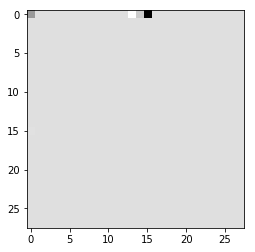

[-1.75692756e+18  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.02376364e+17 -4.87064179e+17 -5.61535073e+18
 -5.49360989e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.93892013e+02  3.47976953e+02 -2.43925337e+02
  7.16363847e+01 -1.60992421e+01  5.54467585e+00 -3.12968741e-01
 -1.54543762e+01  3.93870759e+01 -1.20123036e+01  8.24856171e+00
 -1.27470154e+01  2.67709549e+01 -5.05022931e+01  1.31138177e+02
 -1.54649884e+02  2.03903699e+02 -5.37348727e+01 -1.09177294e+02
  9.85157311e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.86714828e+03
  2.36689175e+02 -8.58379

In [3]:
clf.plot_parameter(index_)

- This is the parameter, and plot the parameter using matplotlib

\begin{equation} \theta = [ \theta_{1}, \theta_{1},\dots, \theta_{n}] \end{equation}

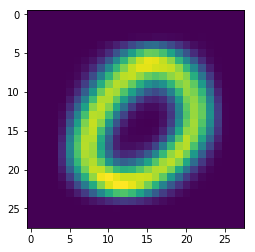

In [4]:
plt.imshow(TP_image.reshape((28,28)))
plt.show()

- This is the average True Positive image.

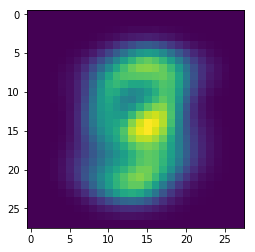

In [5]:
plt.imshow(TN_image.reshape((28,28)))
plt.show()

- This is the average True Negative image

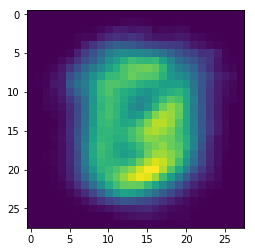

In [6]:
plt.imshow(FP_image.reshape((28,28)))
plt.show()

- This is the average False Positive image.

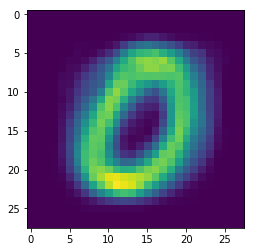

In [7]:
plt.imshow(FN_image.reshape((28,28)))
plt.show()

- This is the average False Negative image.

In [8]:
print(F_score)

[812, 824, 8195, 168]


- This is the evaluation table [TP, FP, TN, FN]